![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
# Your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

**Import data**

In [0]:
link = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv"
# Note: set param encoding = 'latin1'
# Your code here
ordata = pd.read_csv(link, encoding = 'latin1')

In [3]:
# Print out First 5 rows from dataframe
# Your code here
ordata.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# Print out brief info
ordata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
# Your code here
ordata.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
# List all NaN values
'''
The lazy way to do is to use built in function
'''
ordata[ordata.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/10 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/10 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/10 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/10 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/10 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/10 14:32,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/10 14:32,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/10 14:32,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/10 14:32,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/10 14:32,0.43,NaN,United Kingdom


In [7]:
# Wow quite a lot of missing data in description and customerid, this will affect a lot when making analysist
# For now we can do nothing but just drop all NAN value
ordata_no_null = ordata.dropna(how= 'any')
ordata_no_null.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

**Exclude negative Quatity entries**

In [8]:
# Hmmm negative quantity and price???
# lets have some info first
ordata_no_null.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
# Wow, negative quantity and 0 price. Hmmm, that must be cancelled or returned ordered
# Let's inspect more closely
cancelled_orders = ordata_no_null[ordata_no_null['Quantity'] < 0]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [10]:
# Ho! Pretty interesting, all the InvoiceNo starts with C indicate for 'Cancelled'
# Hmmmm, missing a lot of data already affect a lot on the data analysist, now we have this "Cancelled order" pain as well
# Maybe a quick look how much cancelled orders compare to total order won't hurt
print(str(len(cancelled_orders)/ordata_no_null['InvoiceNo'].nunique() * 100) + '%')

40.130689499774675%


In [0]:
# Well well well, it won't be exaggerate to say half the number of orders are cancelled one
# This number also not really true since we also delete a lot of records, but this still give us a nice insight of the data
# We can really do an analysis and machine learning for cancelled orders predictions pattern and find a way to minimize that
# Still, not our business as this is not included in the scope of this assignment and we severly lack aspects related to cancellation
# Even Description feature can give us a little bit of insight but we are not provided any interesting info in it
# Maybe i am wrong, but who knows???

In [0]:
ordata_exclude_negative_quantities = ordata_no_null[ordata_no_null.Quantity > 0]

**Exclude negative Price entries**

In [0]:
ordata_updated = ordata_exclude_negative_quantities[ordata_exclude_negative_quantities.UnitPrice > 0]

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [14]:
# Your code here
# retail_uk = retail_df[retail_df['Country']=='United Kingdom']
uk_data = ordata_updated[ordata_updated['Country'] == 'United Kingdom']
num_cus = uk_data.groupby('CustomerID',as_index= False)['Quantity'].sum().sort_values(by = 'Quantity', ascending = False)
num_cus.head()

,CustomerID,Quantity
2598,16446.0,80997
0,12346.0,74215
3314,17450.0,69993
3356,17511.0,64549
3783,18102.0,64124


**The customer with the highest money spent on purchases comes from Netherlands**

In [15]:
# Your code here
# amount_spent = quantity * unit_price
# lets create new column
ordata_updated['AmountSpent'] = ordata_updated.apply(lambda row: row['Quantity'] * row['UnitPrice'], axis = 1)
nether_data = ordata_updated[ordata_updated['Country'] == 'Netherlands']
highest_spent = nether_data.sort_values(by = 'AmountSpent', ascending = False)
highest_spent.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
421601,573003,23084,RABBIT NIGHT LIGHT,2400,10/27/11 12:11,2.08,14646.0,Netherlands,4992.00
534952,581175,23084,RABBIT NIGHT LIGHT,1440,12/7/11 15:16,1.79,14646.0,Netherlands,2577.60
204198,554642,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,960,5/25/11 12:19,1.45,14646.0,Netherlands,1392.00
409248,572052,22595,GINGHAM HEART DECORATION,1728,10/20/11 12:26,0.72,14646.0,Netherlands,1244.16
137027,548011,22630,DOLLY GIRL LUNCH BOX,640,3/29/11 11:14,1.65,14646.0,Netherlands,1056.00


**On which year had the highest sales?**

In [25]:
# Your code here
# let's convert to datetime format first 
ordata_updated['InvoiceDate']=pd.to_datetime(ordata_updated['InvoiceDate'], format='%m/%d/%y %H:%M')
# let's add new column year
# There's a new grouper functions to group date in the new version of pandas, but somehow i can't seem to use it without errors
# let's just stick with good old traditional way
ordata_updated['Year'] = ordata_updated['InvoiceDate'].dt.year
highest_sale = ordata_updated.groupby(ordata_updated['Year'], as_index= False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending = 'False')
highest_sale

,Year,AmountSpent
0,2010,5.727139e+05
1,2011,8.338694e+06


**How many orders (per hour)?**

In [17]:
# let's add new column hour
ordata_updated['Hour'] = ordata_updated['InvoiceDate'].dt.hour
ordata_updated.groupby('InvoiceNo')['Hour'].unique().value_counts().sort_index()

ValueError: ignored

In [18]:
# Wait, What???
# Hmmm, let's make some inspection
ordata_updated.groupby('InvoiceNo')['Hour'].unique().value_counts()

[12]        3129
[13]        2636
[11]        2276
[14]        2274
[10]        2226
[15]        2037
[9]         1393
[16]        1100
[8]          555
[17]         544
[18]         169
[19]         144
[7]           29
[20]          18
[6]            1
[11, 12]       1
Name: Hour, dtype: int64

In [19]:
# Now that's weird, the last row has 2 values???
# Since it not affect much, lets just ignore it right away
ordata_updated.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

[6]        1
[7]       29
[8]      555
[9]     1393
[10]    2226
[11]    2276
[12]    3129
[13]    2636
[14]    2274
[15]    2037
[16]    1100
[17]     544
[18]     169
[19]     144
[20]      18
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

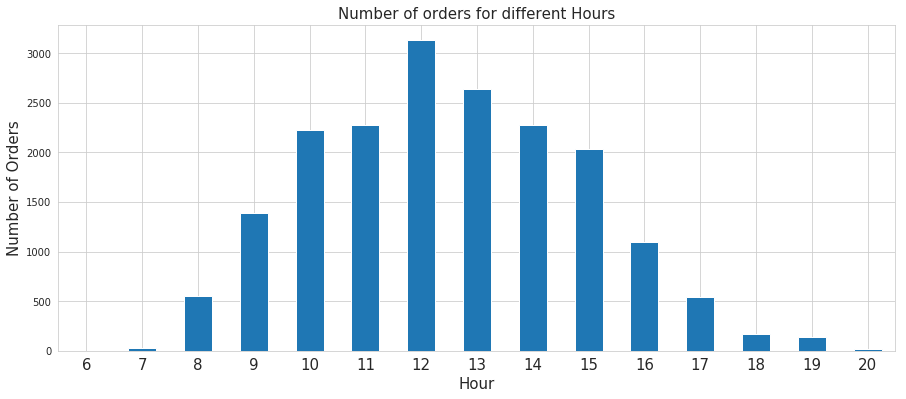

In [20]:
# As much as i want to use barplot of seaborn
# However, it require 2 axis with dataframe
# We only want to plot with current data
# let's go back with plt
color = sns.color_palette()
ax = ordata_updated.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

**How many orders (per month)?**

In [21]:
# let's add new column month
ordata_updated['Month'] = ordata_updated['InvoiceDate'].dt.month
ordata_updated.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index()

[1]      987
[2]      997
[3]     1321
[4]     1149
[5]     1555
[6]     1393
[7]     1331
[8]     1280
[9]     1755
[10]    1929
[11]    2657
[12]    2178
Name: Month, dtype: int64

**Make a plot about number of orders per month**

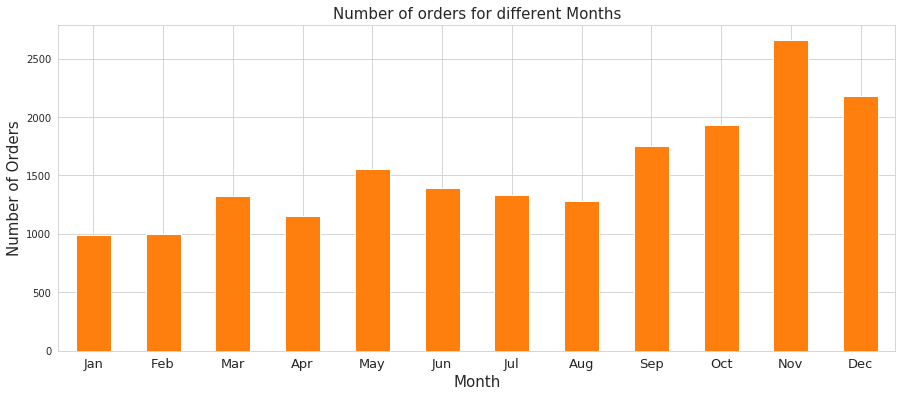

In [22]:
ax = ordata_updated.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot('bar',color=color[1],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months',fontsize=15)
ax.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'), rotation='horizontal', fontsize=13)
plt.show()

**Top 10 items most sales**

In [23]:
top_items = ordata_updated.groupby(by=['CustomerID', 'Country'], as_index = False)['StockCode'].count()
top_items.sort_values(by = 'StockCode', ascending = False).head(10)

,CustomerID,Country,StockCode
4018,17841.0,United Kingdom,7847
1887,14911.0,EIRE,5675
1297,14096.0,United Kingdom,5111
334,12748.0,United Kingdom,4595
1669,14606.0,United Kingdom,2700
2184,15311.0,United Kingdom,2379
1697,14646.0,Netherlands,2076
570,13089.0,United Kingdom,1818
698,13263.0,United Kingdom,1677
1442,14298.0,United Kingdom,1637


**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

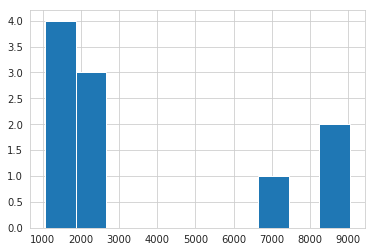

In [24]:
# Your code here
top_quantity = ordata_updated.groupby(by = 'Country')['Quantity'].count().sort_values(ascending = False)
del top_quantity['United Kingdom']
top_quantity.head(10).hist()

# What can you tell about this?
# Well only 4 significant contries show up here

### You are awesome!!